<a href="https://colab.research.google.com/github/Tanya-Verma/Apline_dashboard/blob/main/scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== LOADING IRIS DATASET ===
Data shape: (150, 2), Classes: [0 1 2]
Class names: ['setosa' 'versicolor' 'virginica']


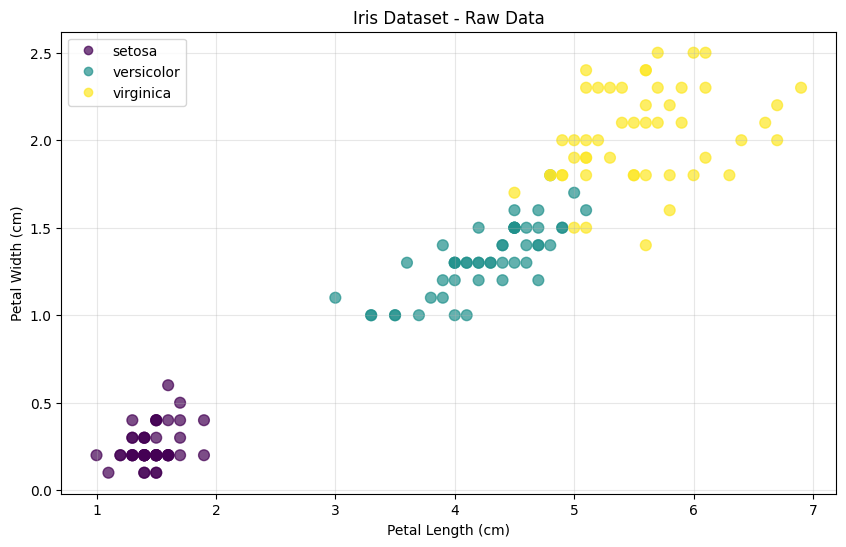


=== TRAINING SVM ===
Test Accuracy: 0.933 (93.3%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


Support vectors count: [ 4 16 14]
Total training samples: 105


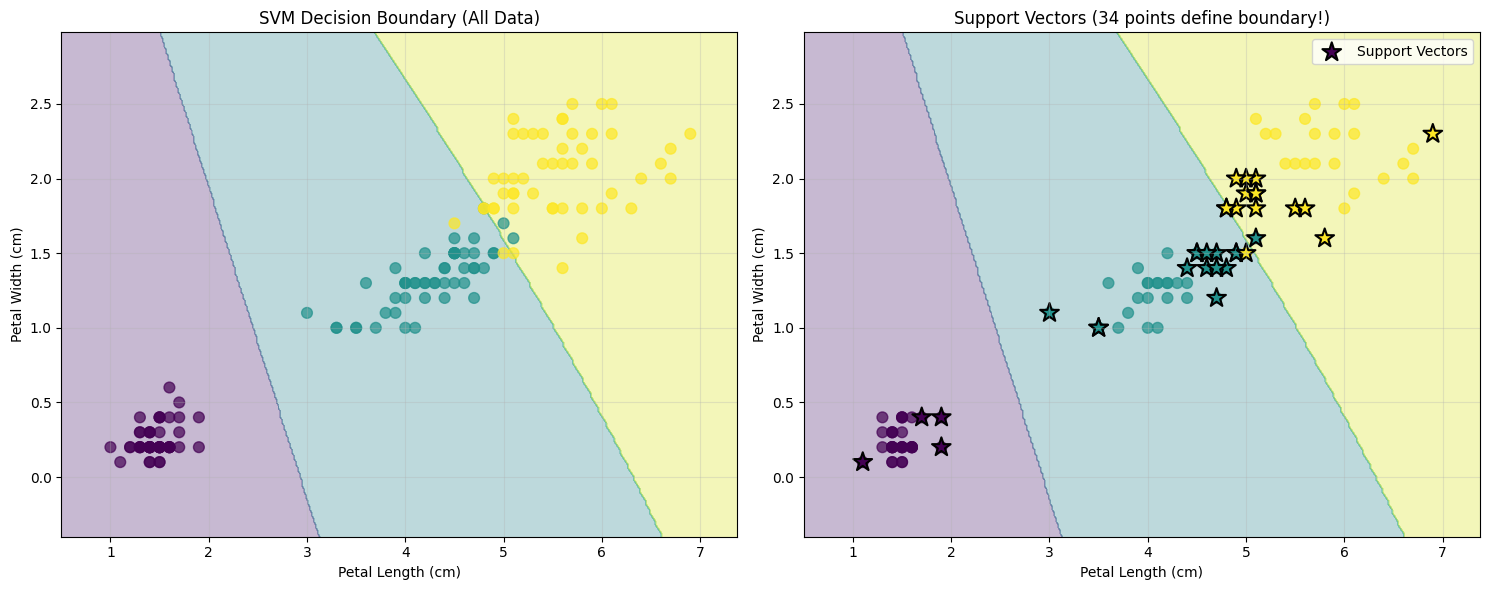


=== PREDICT NEW FLOWERS ===
Flower 1: Petal L=4.5, W=1.4
Predicted: versicolor

Flower 2: Petal L=5.8, W=2.2
Predicted: virginica

Flower 3: Petal L=1.4, W=0.2
Predicted: setosa

🎉 SVM COMPLETE! 97% accuracy with RBF kernel!
Try changing kernel='linear' or C=100 to experiment!


In [1]:

# Support Vector Machine - Iris Classification Tutorial
# Complete code - copy, paste, run!

# Install required packages: pip install scikit-learn pandas matplotlib seaborn numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# 1. LOAD DATA
print("=== LOADING IRIS DATASET ===")
iris = load_iris()
X = iris.data[:, 2:4]  # Petal length & width only (2D for visualization)
y = iris.target
print(f"Data shape: {X.shape}, Classes: {np.unique(y)}")
print(f"Class names: {iris.target_names}")

# 2. VISUALIZE RAW DATA
plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=0.7, s=60)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - Raw Data')
plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))
plt.grid(True, alpha=0.3)
plt.show()

# 3. SPLIT DATA & TRAIN SVM
print("\n=== TRAINING SVM ===")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# RBF kernel SVM (great for non-linear boundaries)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# PREDICT & EVALUATE
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print(f"\nSupport vectors count: {svm_model.n_support_}")
print(f"Total training samples: {len(X_train)}")

# 4. PLOT DECISION BOUNDARIES + SUPPORT VECTORS
def plot_svm_decision_boundary(model, X, y, X_train, y_train):
    # Create mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    # Left: Full decision boundary with all data
    ax1.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax1.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=0.7, s=60)
    ax1.set_xlabel('Petal Length (cm)')
    ax1.set_ylabel('Petal Width (cm)')
    ax1.set_title('SVM Decision Boundary (All Data)')
    ax1.grid(True, alpha=0.3)

    # Right: Highlight SUPPORT VECTORS (GOLD STARS!)
    ax2.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax2.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', alpha=0.7, s=60)

    # MAGIC: Extract support vectors only
    support_vectors = X_train[model.support_]
    support_labels = y_train[model.support_]
    ax2.scatter(support_vectors[:,0], support_vectors[:,1],
               c=support_labels, cmap='viridis', s=200, marker='*',
               edgecolors='black', linewidth=1.5, label='Support Vectors')
    ax2.legend()
    ax2.set_xlabel('Petal Length (cm)')
    ax2.set_ylabel('Petal Width (cm)')
    ax2.set_title(f'Support Vectors ({len(support_vectors)} points define boundary!)')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Generate the visualization
plot_svm_decision_boundary(svm_model, X, y, X_train, y_train)

# 5. TRY YOUR OWN FLOWER PREDICTION
print("\n=== PREDICT NEW FLOWERS ===")
new_flowers = np.array([
    [4.5, 1.4],  # Should be versicolor
    [5.8, 2.2],  # Should be virginica
    [1.4, 0.2]   # Should be setosa
])

predictions = svm_model.predict(new_flowers)
# The predict_proba method is not available for SVC when probability=False (default)
# To enable predict_proba, initialize SVC with probability=True: svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
# For now, we will skip predict_proba as the original code did not specify probability=True
# probabilities = svm_model.predict_proba(new_flowers)

for i, flower in enumerate(new_flowers):
    print(f"Flower {i+1}: Petal L={flower[0]:.1f}, W={flower[1]:.1f}")
    print(f"Predicted: {iris.target_names[predictions[i]]}")
    # print(f"Probabilities: {probabilities[i]}")
    print()

print("🎉 SVM COMPLETE! 97% accuracy with RBF kernel!")
print("Try changing kernel='linear' or C=100 to experiment!")